In [1]:
from model import Gadget
import pandas as pd
from plotting import plot_conc_and_surf_flux, plot_fission_rate_and_energy, plot_neutron_counts, plot_radius_and_pressure, generic_timeseries_plot
from numpy import argmax
from simulation import Simulation

### Example 1: What happens as the radius increases for an uncompressed sphere of Pu239? When does it reach criticality?
* Here, we set an initial neutron burst in the center of the sphere, then watch the neutron concentrations and fluxes over time to see if they grow (k >1) or decay (k < 1)
* We'll simulate 3 spheres of 100% Pu239 with radii 6.0, 6.1, and 6.4 cm

#### Make 3 spheres with increasing radii

In [2]:
g0 = Gadget(id = 0,
           material = 'Pu239',
           mass_kg = None,
           initial_radius_m = 0.06,
           initial_density_multiplier = 1.0,
           initial_neutron_conc_perm3 = 0,
           initial_neutron_burst_conc_perm3 = 310000000, # ~8 neutrons
           time_step_s = 3E-10,
           num_points_radial = 100,
           neutron_multiplication_on = True,
           tamper_mass_kg = 0)

g1 = Gadget(id = 1,
           material = 'Pu239',
           mass_kg = None,
           initial_radius_m = 0.061,
           initial_density_multiplier = 1.0,
           initial_neutron_conc_perm3 = 0,
           initial_neutron_burst_conc_perm3 = 310000000, # ~8 neutrons
           time_step_s = 3E-10,
           num_points_radial = 100,
           neutron_multiplication_on = True,
           tamper_mass_kg = 0)

g2 = Gadget(id = 2,
           material = 'Pu239',
           mass_kg = None,
           initial_radius_m = 0.064,
           initial_density_multiplier = 1.0,
           initial_neutron_conc_perm3 = 0,
           initial_neutron_burst_conc_perm3 = 310000000, # ~8 neutrons
           time_step_s = 3E-10,
           num_points_radial = 100,
           neutron_multiplication_on = True,
           tamper_mass_kg = 0)

gadget_list = []
gadget_list.extend((g0, g1, g2))


Establishing mass of 14.11 kg from radius of 6.00 cm
Establishing mass of 14.83 kg from radius of 6.10 cm
Establishing mass of 17.13 kg from radius of 6.40 cm


#### Run the simulations

In [3]:
for g in gadget_list:
    print(f'Working on gadget id {g.id}')
    for i in range(8000):
        if g.states[-1].cumulative_number_of_fissions >= g.number_active_nuclei:
            print('All active nuclei fissioned')
            break
        if g.states[-1].density_kgperm3 < 0.5 * g.states[0].density_kgperm3:
            print('Density reached 50% initial value')
            break
        g.run_sim_step()
    g.post_process()
    print(f'Done with gadget id {g.id}\n')



Working on gadget id 0
Done with gadget id 0

Working on gadget id 1
Done with gadget id 1

Working on gadget id 2
Done with gadget id 2



#### How does the neutron population change over time?

* Let's plot the neutrons in the sphere, the neutrons that have escaped (left) and the cumulative total
* We see that the 6.0 and 6.1 cm radius sphere showing a decaying population, while the 6.4 cm radius sphere has a growing population. This indicates that the critical radius is between 6.1 and 6.4 cm (B.C. Reed quotes R_crit as 6.346 cm)

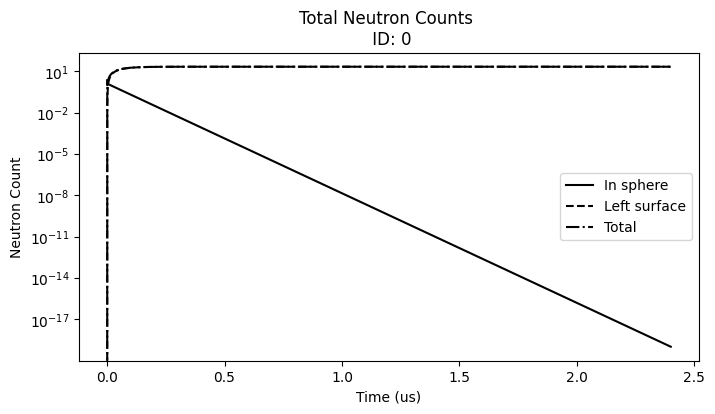

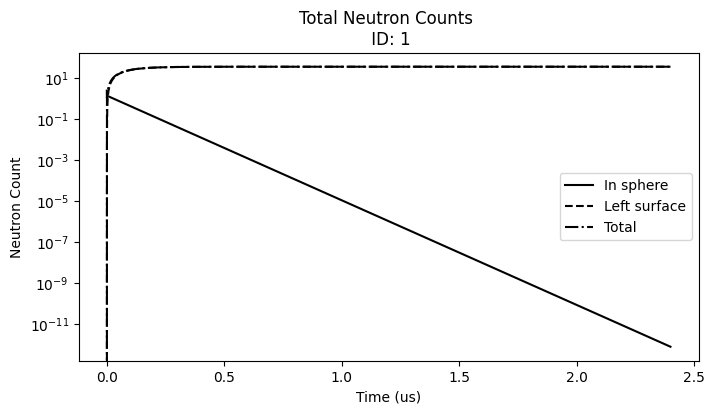

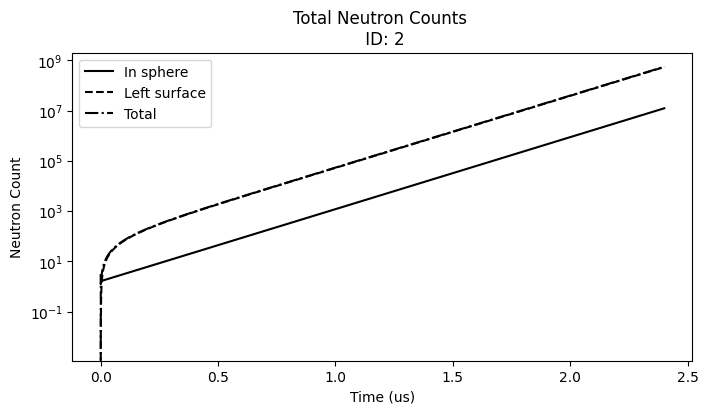

In [4]:
plot_neutron_counts(gadget = g0)
plot_neutron_counts(gadget = g1)
plot_neutron_counts(gadget = g2)